# Clasificador de digitos / 1 = 7; 0 = otro dígito

## Paso 1. Cargar librerías y módulos requerdidos

In [ ]:
import os            #módulo para manejar carpetas y archivos en nuestro ordenador
import random        #módulo para aleatorizar

import numpy as np   #librería para manejar matrices y operaciones de matrices 
import pandas as pd  #librería para manejar tablas de datos


                                       #Skimage (Scikit-image): librería para procesamiento de imagenes
from skimage import io                 #Modulo para leer una imagen (librería para procesamiento de imagenes)
#from skimage.transform import rescale  #Función dentro del modulo transform, para cambiar el tamaño de una imagen 


                                                       #Sklearn (Scikit-learn): librería para machine learning 
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import Perceptron 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt        #Para graficar y visualizar
import seaborn as sns


# para especificar que queremos las graficas en linea sin necesidad de usar plt.show()
%matplotlib inline      

## Paso 2. Lectura de datos. 

### 2.1 Lectura de datos - variables (X) y etiquetas (Y) en un solo archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leemos los datos

ruta = "/content/drive/MyDrive/Datos/DatosDigitos"

datos = pd.read_csv(ruta + '/digitos_7.csv')

In [ ]:
datos.head()  #muestra los primeros cinco registros

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,clase7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [ ]:
#¿Con cuántas imagenes vamos a trabajar?

datos.shape[0]

70000

In [ ]:
#¿cuántas imagenes tenemos de cada clase?

datos['clase7'].value_counts(sort=False)  

False    62707
True      7293
Name: clase7, dtype: int64

In [ ]:
datos.iloc[29]

0            0
1            0
2            0
3            0
4            0
          ... 
780          0
781          0
782          0
783          0
clase7    True
Name: 29, Length: 785, dtype: object

#### Clase True corresponde a 7 y False a otros dígitos

In [ ]:
# Convertimos de true/false a 1/0 y guardamos las etiquetas
Y = datos['clase7'].apply(lambda x: 1 if x else 0)

In [ ]:
# Guardamos las variables en X
X = datos.iloc[:,0:784]

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


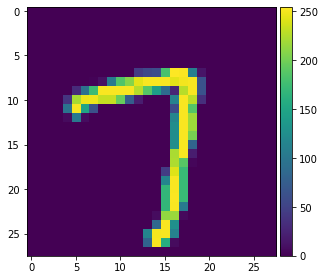

In [ ]:
# Dibujamos algunas imagenes
io.imshow(X.iloc[4242].values.reshape(28,28)) 

- Dimensión 0: 28 renglones de pixeles de arriba a abajo
- Dimensión 1: 28 columnas de pixeles de izquierda a derecha


##### Visualizamos ejemplos de ambas clases de imagenes

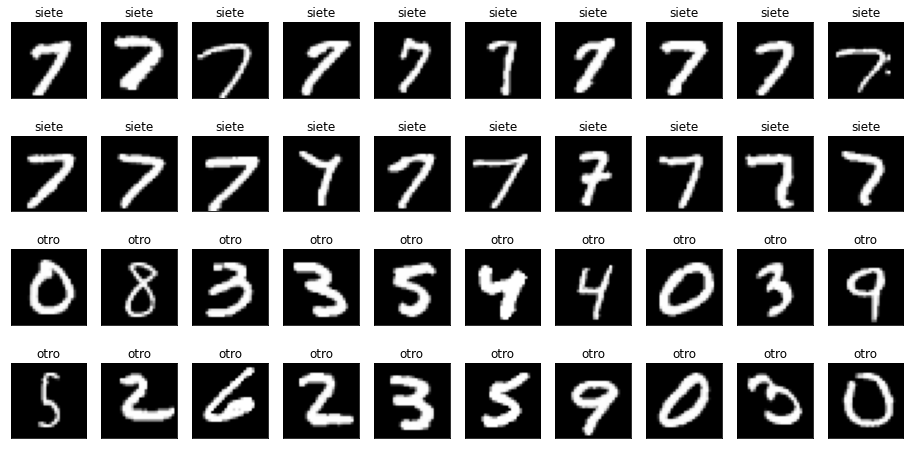

In [ ]:
#El método GroupBy de Pandas separa un data frame en varios data frames
porClase = datos.groupby('clase7')

#elije al azar n muestras de cada subconjunto y guarda la posición de las figuras elegidas en una lista
n = 20
c = random.sample(porClase.get_group(1).index.tolist(), n) # indices de las imagenes cancerígenas seleccionadas
s = random.sample(porClase.get_group(0).index.tolist(), n) # indices de las imagenes sanas seleccionadas

# Grafica 20 imágenes aleatorias de tejido con cáncer y 20 de tejido sano

fig=plt.figure(figsize=(16, 8))
columns = 10
rows = 4
for i in range(0, columns * rows):
    fig.add_subplot( rows, columns, i+1)
    if i < 20:
        plt.imshow(X.iloc[c[i],:].values.reshape(28,28), cmap='Greys_r')
        plt.title('siete')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(X.iloc[s[i-20],:].values.reshape(28,28), cmap='Greys_r')
        plt.title('otro')
        plt.xticks([])
        plt.yticks([])
plt.show()

## Paso 3. Entrenamiento utilizando perceptrón simple con conjunto de entrenamiento y prueba

### 3.1  Crear subconjuntos de entrenamiento y prueba



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    shuffle=True, random_state=0)

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("Y: ", y_train.shape)
unique, counts= np.unique(y_train, return_counts=True)
print('Otros:  ', counts[0],'\nSietes: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("Y: ", y_test.shape)
unique, counts= np.unique(y_test, return_counts=True)
print('Otros:  ', counts[0],'\nSietes: ', counts[1],'\n')

Training set
X:  (49000, 784)
Y:  (49000,)
Otros:   43896 
Sietes:  5104 

Test set
X:  (21000, 784)
Y:  (21000,)
Otros:   18811 
Sietes:  2189 



### 3.2  Entrenamiento



In [ ]:
model = Perceptron(max_iter=1000,  random_state=0) 
model.fit(X_train,y_train)                                  

print("Iterations: ", model.n_iter_)

Iterations:  14


In [ ]:
#Guardamos los coeficientes del modelo como beta

beta=model.coef_
print(beta.shape)

(1, 784)


In [ ]:
y_predict=model.predict(X_test)  #pasa cada una de las imágenes de X_test por el modelo 
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_predict)*100))  # precision con test data

Accuracy: 97.69%


In [ ]:
print("Precisión conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

Precisión conjunto entrenamiento: 98.09%
Precisión conjunto prueba: 97.69%


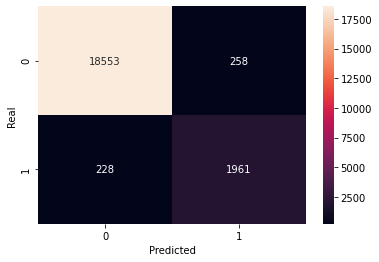

In [ ]:
#Matriz de confusión

data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [ ]:
# guardamos los indices de los sietes en una lista
n
indices = []
n = 0
for y in y_predict:
   if y == 1 :
      indices.append(n)
   n = n +1

In [ ]:
unique, counts= np.unique(y_predict, return_counts=True)
print('Otros:  ', counts[0],'\nSietes: ', counts[1],'\n')

Otros:   18781 
Sietes:  2219 



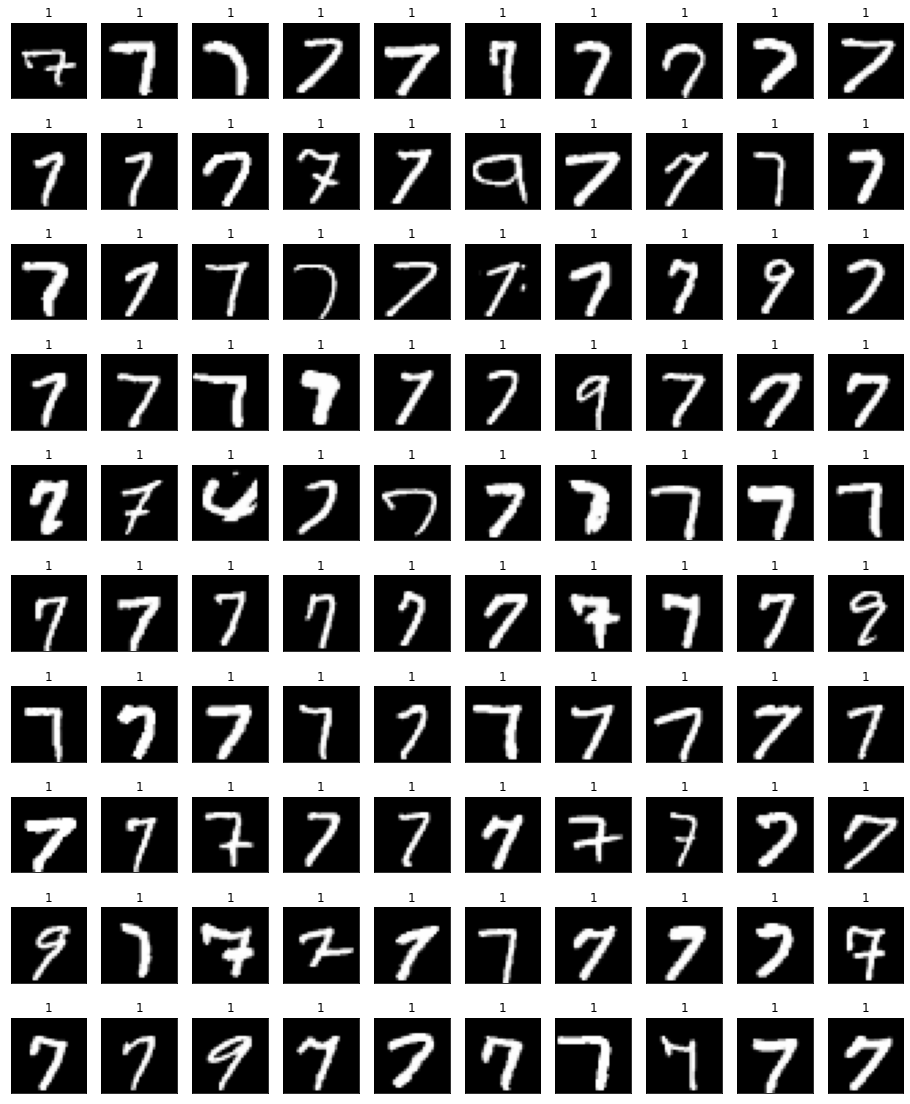

In [ ]:
#Graficamos algunas imagenes para ver que efectivamente son sietes
n = 100
# c = random.sample(indices,40)
# Grafica 40 imágenes aleatorias de sietes

fig=plt.figure(figsize=(16, 20))
columns = 10
rows = 10
for i in range(0, columns * rows):
    fig.add_subplot( rows, columns, i+1)
    plt.imshow(X_test.iloc[indices[i],:].values.reshape(28,28), cmap='Greys_r')
    plt.title(y_predict[indices[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
y_predict[14722]

1

In [ ]:
y_test[20259]

KeyError: ignored

## Paso 4. Entrenamiento de perceptron utilizando margen

In [ ]:
model2 = Perceptron(max_iter=1000,  random_state=0, penalty='l2',  alpha=0.0001) 
model2.fit(X_train,y_train)                                  

print("Precisión conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


Precisión conjunto entrenamiento: 97.84%
Precisión conjunto prueba: 97.66%


In [ ]:
model2 = Perceptron(max_iter=1000,  random_state=0, penalty='l2', alpha=0.000005) 
model2.fit(X_train,y_train)                                  

print("Precisión conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


Precisión conjunto entrenamiento: 97.83%
Precisión conjunto prueba: 97.48%


In [ ]:
model2 = Perceptron(max_iter=1000,  random_state=0, penalty='l2', alpha=0.000001) 
model2.fit(X_train,y_train)                                  

print("Precisión conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


Precisión conjunto entrenamiento: 98.03%
Precisión conjunto prueba: 97.72%
